In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

all_files = glob.glob(os.path.join('../data/generated/' , "synthetic_*.csv"))
print(all_files)

dataset = pd.DataFrame()
for idx, filename in enumerate(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    df['Person'] = idx + 1
    dataset = pd.concat([dataset, df])

print(dataset.info())



['../data/generated/synthetic_data_1694199604.5662858.csv', '../data/generated/synthetic_data_1694199554.712837.csv', '../data/generated/synthetic_data_1694199587.9125023.csv']
<class 'pandas.core.frame.DataFrame'>
Index: 26501 entries, 0 to 8836
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Amount                            26501 non-null  float64
 1   Day                               26501 non-null  int64  
 2   Month                             26501 non-null  int64  
 3   Year                              26501 non-null  int64  
 4   Transaction Category              26501 non-null  object 
 5   Inflation Rate                    26501 non-null  float64
 6   Year-Month                        26501 non-null  object 
 7   Credit/Debit                      26501 non-null  object 
 8   Age                               26501 non-null  int64  
 9   Budget                

In [18]:
df = dataset

# Descriptive statistics
print("Descriptive statistics:")
df.describe()


Descriptive statistics:


,Amount,Day,Month,Year,Inflation Rate,Age,Budget,Dependent Family Size,Number of Expenses a Month,Estimated Monthly Expenses,Cumulative Monthly Spending,Last Month Budget,Average Monthly Budget,Person
count,26501.000000,26501.000000,26501.000000,26501.000000,2.650100e+04,26501.0,26501.000000,26501.0,26501.0,26501.0,26501.000000,26501.000000,26501.000000,26501.000000
mean,1767.225388,10.366892,5.959888,2017.030338,1.400000e+00,31.0,157864.051168,0.0,90.0,100000.0,86573.912871,157151.352968,157687.786716,2.000151
std,853.877333,6.458079,3.144869,2.566192,6.992317e-13,0.0,33655.114938,0.0,0.0,0.0,47573.942537,33429.243235,884.245231,0.816574
min,370.000000,1.000000,1.000000,2013.000000,1.400000e+00,31.0,92545.000000,0.0,90.0,100000.0,405.000000,92545.000000,156476.570000,1.000000
25%,1080.000000,5.000000,3.000000,2015.000000,1.400000e+00,31.0,131165.000000,0.0,90.0,100000.0,48865.000000,130810.000000,156476.570000,1.000000
50%,1695.000000,9.000000,6.000000,2017.000000,1.400000e+00,31.0,152715.000000,0.0,90.0,100000.0,84145.000000,152130.000000,158023.740000,2.000000
75%,2365.000000,14.000000,9.000000,2019.000000,1.400000e+00,31.0,173810.000000,0.0,90.0,100000.0,118570.000000,173410.000000,158562.730000,3.000000
max,4060.000000,30.000000,11.000000,2021.000000,1.400000e+00,31.0,261410.000000,0.0,90.0,100000.0,261410.000000,261410.000000,158562.730000,3.000000


In [19]:
# Correlation matrix
print("Correlation matrix:")
corr_matrix = df[['Year', 'Month', 'Day', 'Last Month Budget', 'Average Monthly Budget', 'Cumulative Monthly Spending',
                  'Dependent Family Size', 'Inflation Rate', 'Age', 'Number of Expenses a Month', 'Estimated Monthly Expenses', 'Budget']].corr()
corr_matrix

Correlation matrix:


,Year,Month,Day,Last Month Budget,Average Monthly Budget,Cumulative Monthly Spending,Dependent Family Size,Inflation Rate,Age,Number of Expenses a Month,Estimated Monthly Expenses,Budget
Year,1.000000,0.018162,0.168393,-0.341411,-0.001389,-0.165210,NaN,NaN,NaN,NaN,NaN,-0.416218
Month,0.018162,1.000000,0.485000,0.299714,0.000432,0.080588,NaN,NaN,NaN,NaN,NaN,0.356782
Day,0.168393,0.485000,1.000000,0.168719,0.003016,0.777546,NaN,NaN,NaN,NaN,NaN,0.190191
Last Month Budget,-0.341411,0.299714,0.168719,1.000000,0.026219,0.239612,NaN,NaN,NaN,NaN,NaN,0.746146
Average Monthly Budget,-0.001389,0.000432,0.003016,0.026219,1.000000,0.001927,NaN,NaN,NaN,NaN,NaN,0.023919
Cumulative Monthly Spending,-0.165210,0.080588,0.777546,0.239612,0.001927,1.000000,NaN,NaN,NaN,NaN,NaN,0.331313
Dependent Family Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inflation Rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Expenses a Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


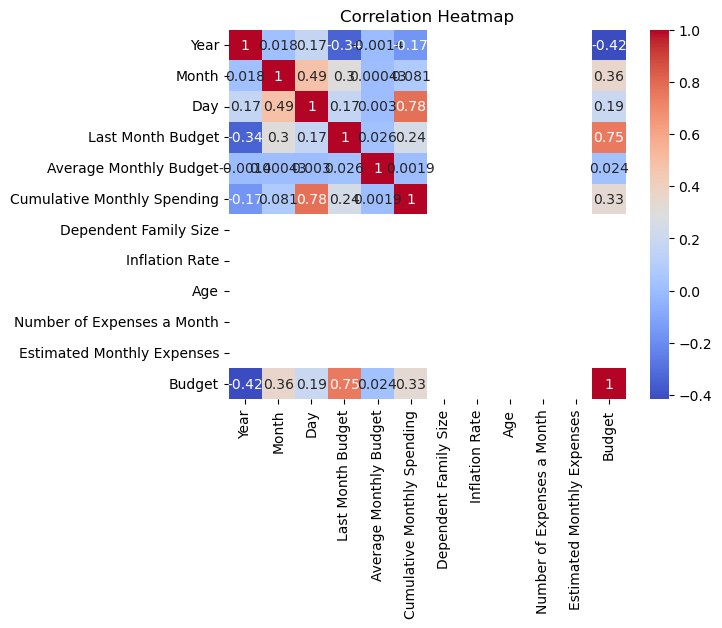

In [20]:

# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


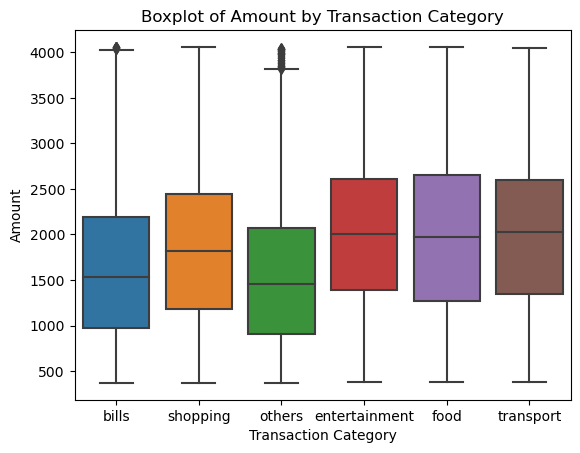

In [21]:

# Boxplot to see the effect of 'Description' on 'Amount'
sns.boxplot(x='Transaction Category', y='Amount', data=df)
plt.title('Boxplot of Amount by Transaction Category')
plt.show()


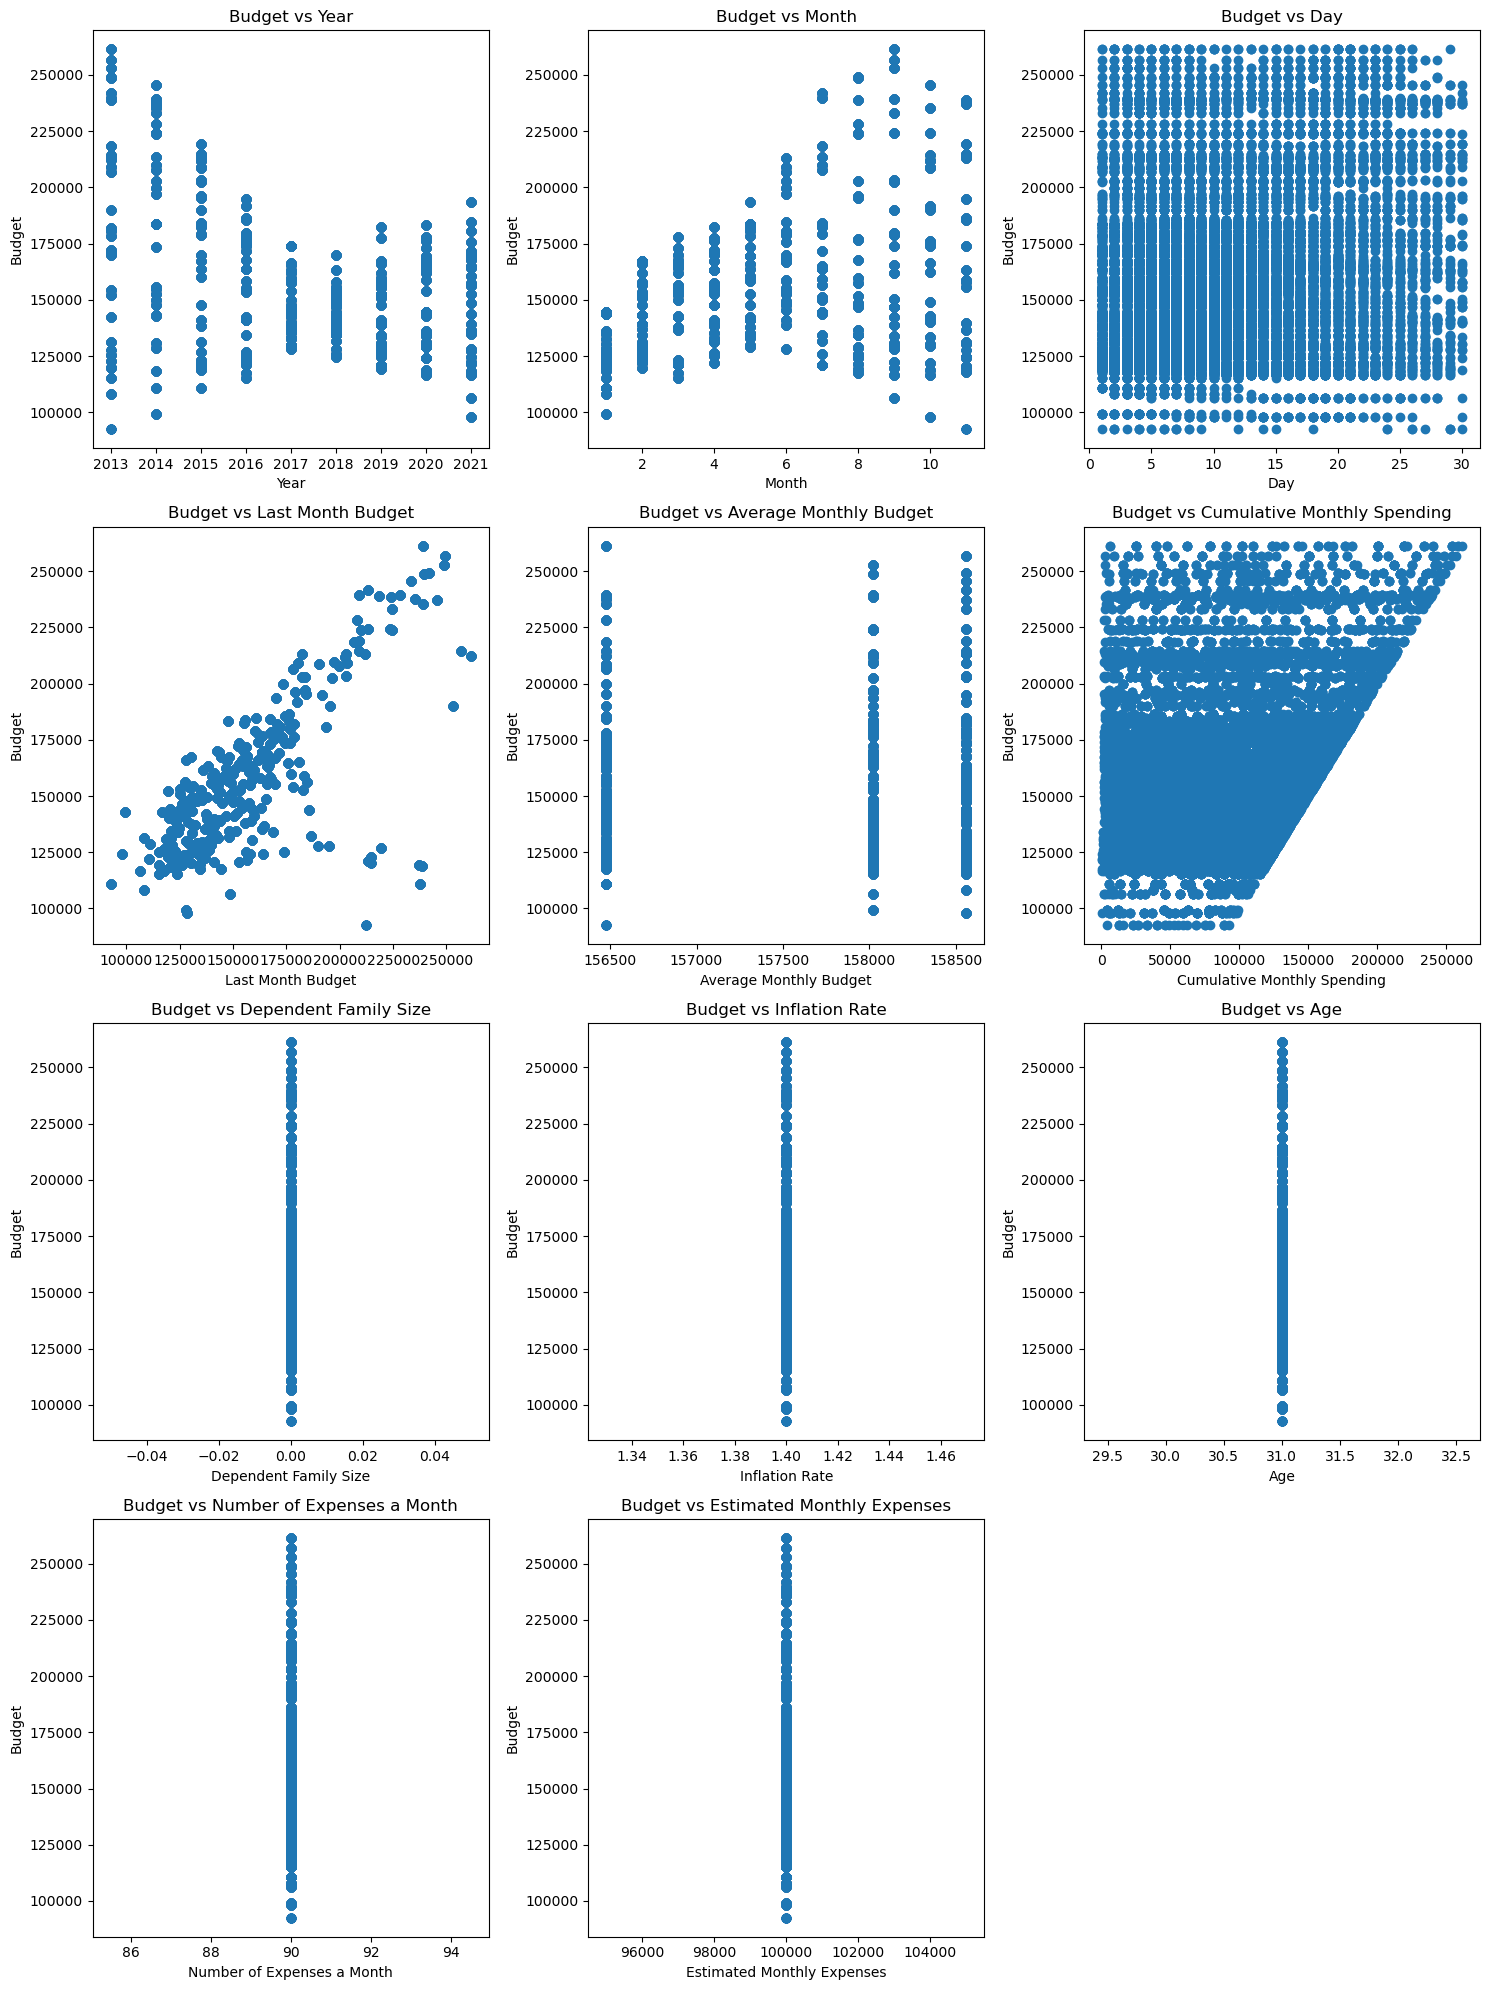

In [22]:
# Fields to be plotted against the budget
fields = ['Year', 'Month', 'Day', 'Last Month Budget', 'Average Monthly Budget', 'Cumulative Monthly Spending',
          'Dependent Family Size', 'Inflation Rate', 'Age', 'Number of Expenses a Month', 'Estimated Monthly Expenses']

# Create subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
axs = axs.flatten()

# Plot each field against the budget
for i, field in enumerate(fields):
    axs[i].scatter(df[field], df['Budget'])
    axs[i].set_title(f"Budget vs {field}")
    axs[i].set_xlabel(field)
    axs[i].set_ylabel("Budget")

# Remove any extra subplots
for i in range(len(fields), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()